In [9]:
%load_ext autoreload
%autoreload 2
import all_function_defs as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# All fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, IFOjsb_all_fluxes_bm)

# path = 
# f.all_fluxes_to_excel(path, IFOjsb_all_fluxes_nm)

### BIOMASS MAXIMISATION

In [10]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "BIOMASS_RT"   
glc_ID = 'EX_glc__D_e'

IFOjsb_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
IFOjsb_all_fluxes_bm

,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.198513
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482057
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.000217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.719381
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.000305,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.011369
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.000412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.364688


In [11]:
growth_rates = IFOjsb_all_fluxes_bm[biomass_rxn_ID]
growth_rates

0    0.033961
1    0.082468
2    0.123068
3     0.17302
4    0.233464
Name: BIOMASS_RT, dtype: object

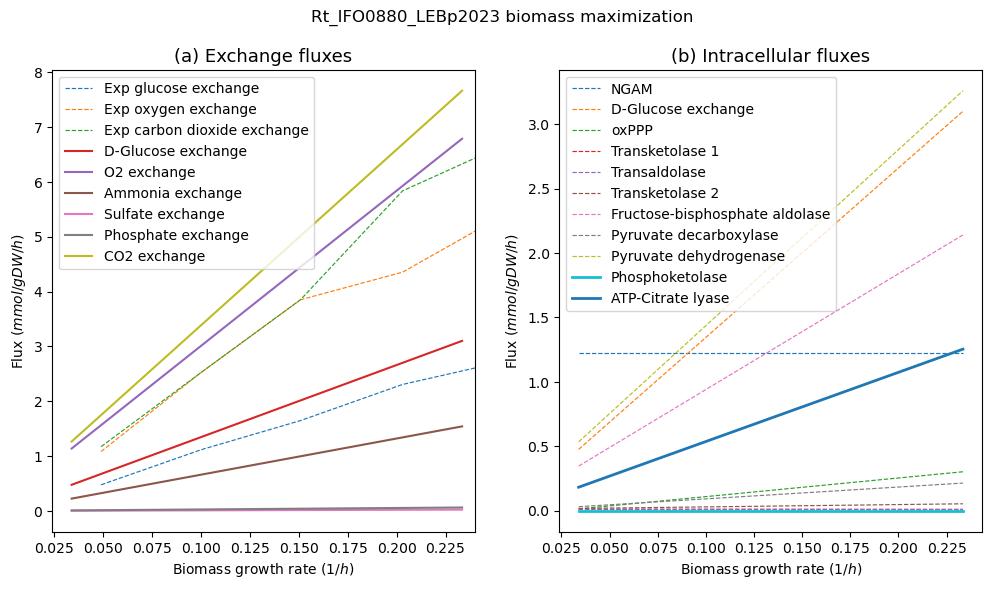

In [12]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL = ['XPK', 'ACITL']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, phosphoketolase_ACL)

title = 'Rt_IFO0880_LEBp2023 biomass maximization'
fig = f.plot_ex_intr_fluxes(IFOjsb_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max.png")

In [13]:
intracellular_fluxes

,NGAM,D-Glucose exchange,oxPPP,Transketolase 1,Transaldolase,Transketolase 2,Fructose-bisphosphate aldolase,Pyruvate decarboxylase,Pyruvate dehydrogenase
0,1.22,-0.476,0.013915,-0.011487,-0.011487,-0.017843,0.346383,0.03121,0.53422
1,1.22,-1.114,0.084058,-0.011138,-0.011138,-0.026574,0.78249,0.075789,1.196733
2,1.22,-1.648,0.142767,-0.010847,-0.010847,-0.033882,1.147508,0.113101,1.751251
3,1.22,-2.305,0.214998,-0.010488,-0.010488,-0.042872,1.596603,0.159007,2.433495
4,1.22,-3.1,0.302401,-0.010054,-0.010054,-0.053752,2.140029,0.214556,3.25904


In [14]:
phosphoketolase_ACL_fluxes

,Phosphoketolase,ATP-Citrate lyase
0,0.0,0.182372
1,0.0,0.442861
2,0.0,0.660888
3,0.0,0.929135
4,0.0,1.253725


COFACTOR balances

In [5]:
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] # 
# Cofactor lists
nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i1 = 0
i2 = 4

SUM produced: 0.5721775402344459, SUM consumed: -0.5721775402344459
SUM produced: 1.38944029800854, SUM consumed: -1.3894402980085403
SUM produced: 2.0734815404088223, SUM consumed: -2.073481540408823
SUM produced: 2.915082844260885, SUM consumed: -2.915082844260885
SUM produced: 3.9334588512050797, SUM consumed: -3.9334588512050797


([<matplotlib.patches.Wedge at 0x1fe71faee10>,
 [Text(0.4272779670930327, 1.013623963231358, '74.6% Alcohol dehydrogenase (ethanol, NADP) (2.93)'),
  Text(-0.8326308041696586, 0.7188365210169749, '5.5% Aldehyde dehydrogenase  acetylaldehyde  NADP   mitochondrial (0.21)'),
  Text(-0.9622976757158537, 0.5329007255689054, '7.7% Glucose 6-phosphate dehydrogenase (0.3)'),
  Text(-1.0618269602375352, 0.28726904899887135, '7.7% Phosphogluconate dehydrogenase (0.3)'),
  Text(-1.0896070218270648, 0.15085270294282027, '0.4% Other producing (0.01)'),
  Text(-1.0976163421797653, 0.07237655269431228, '4.2% Pyridoxine:NADP+ 4-oxidoreductase (0.16)'),
  Text(-1.0990906184667524, -0.04471926205084358, '2.6% Aspartate-semialdehyde dehydrogenase (-0.1)'),
  Text(-1.0917855585455505, -0.13418008105296605, '2.6% C-4 sterol methyl oxidase (4,4-dimethylzymosterol) (-0.1)'),
  Text(-1.0771459830775776, -0.2230617204717991, '2.6% C 4 sterol methyl oxidase  4 methylzymosterol (-0.1)'),
  Text(-1.05546869329281

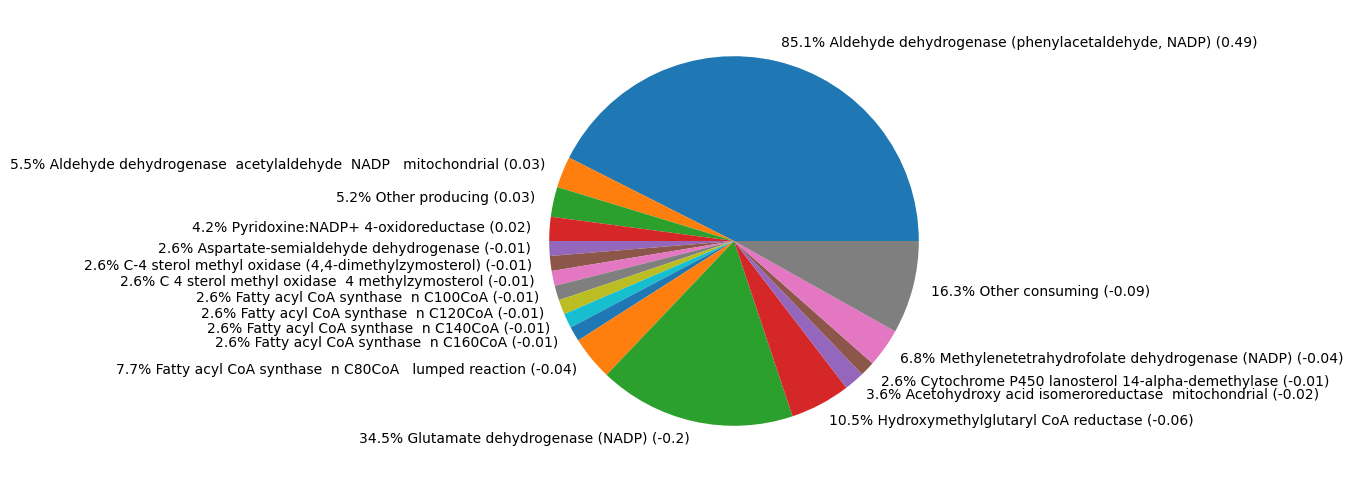

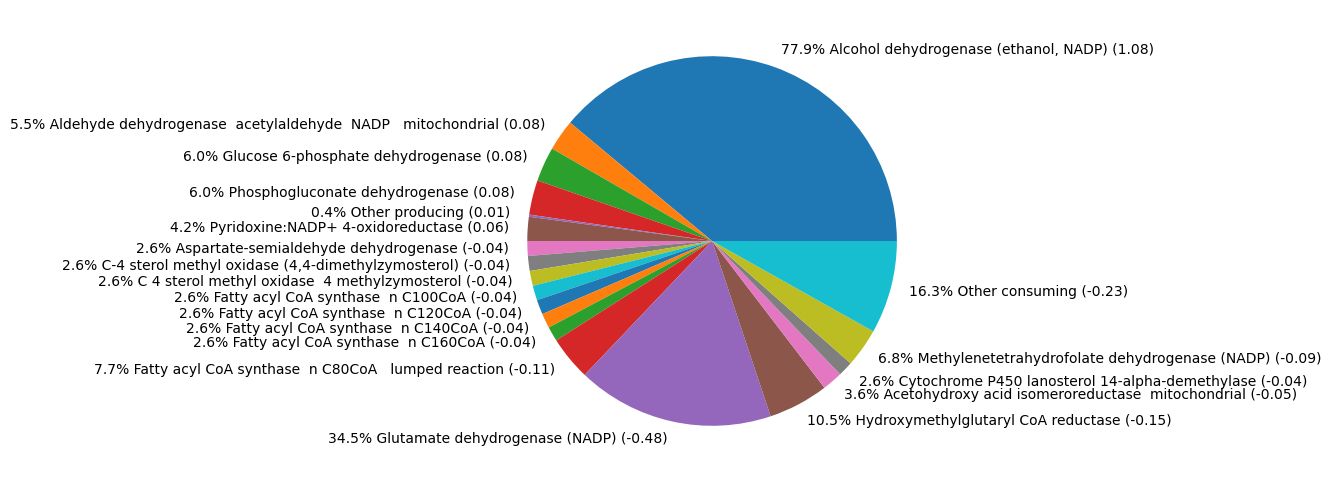

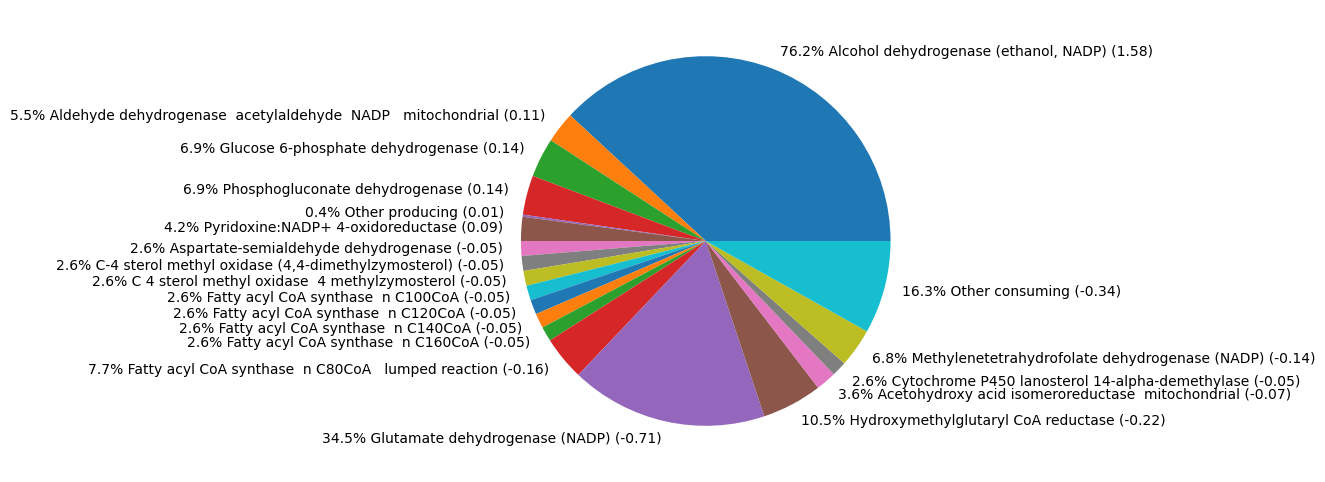

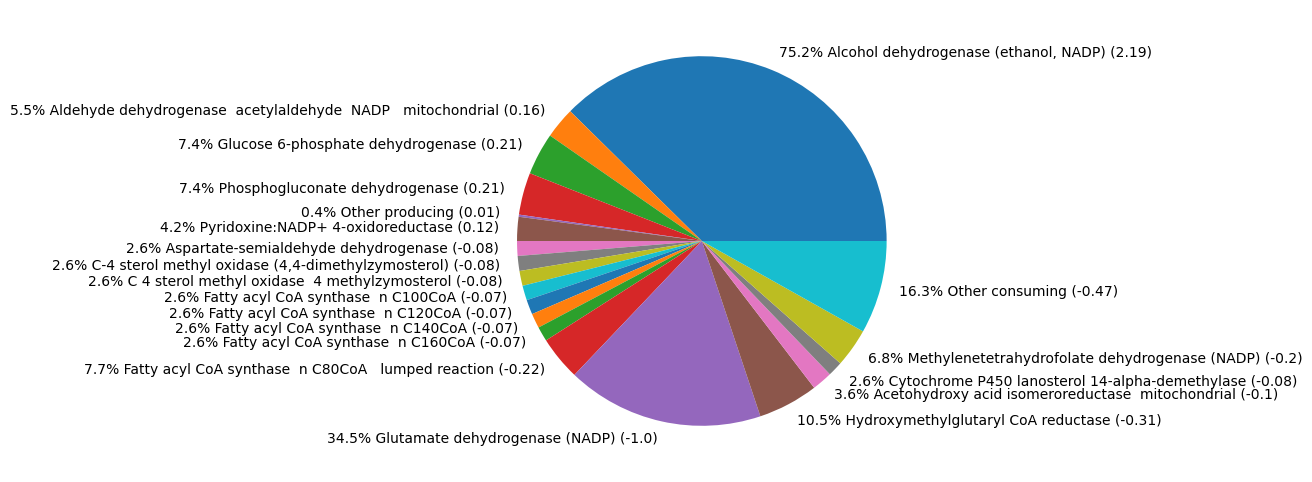

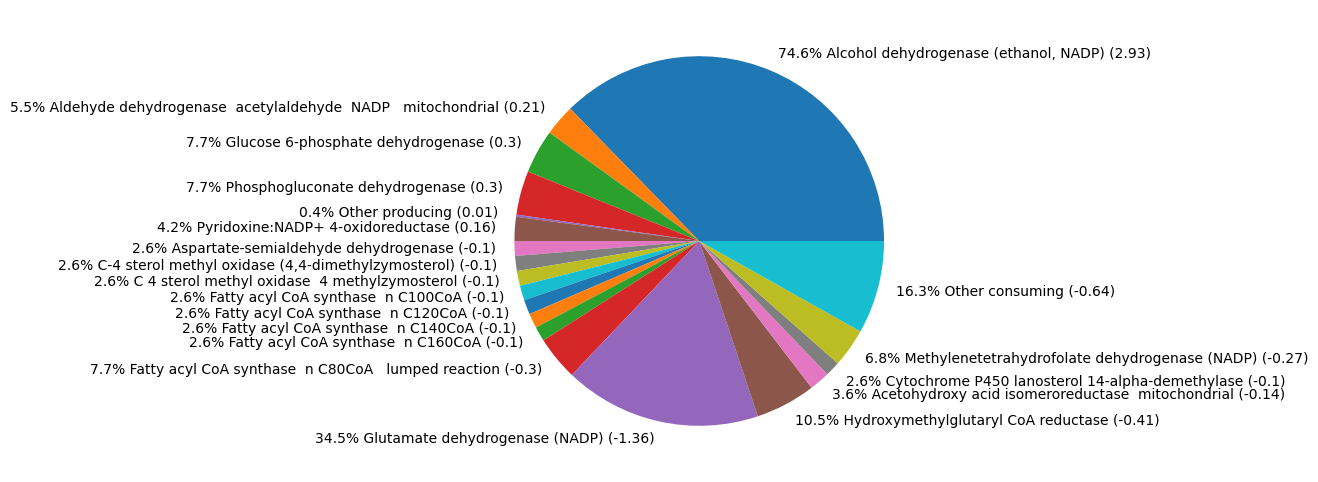

In [6]:

nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH.png")

# See on all GR
nadph_fluxes_1 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 1, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH1.png")

nadph_fluxes_2 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 2, biomass_rxn_ID, glc_ID)
nadph_fluxes_3 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 3, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)
pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3)

nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH_max.png")

pie_nadph_fluxes_0
pie_nadph_fluxes_1
pie_nadph_fluxes_2
pie_nadph_fluxes_3
pie_nadph_fluxes_4

SUM produced: 2.442196319049079, SUM consumed: -2.442196319049079
SUM produced: 14.72159543824519, SUM consumed: -14.72159543824519


([<matplotlib.patches.Wedge at 0x1d71c09b230>,
 [Text(1.0857646129311325, 0.17639502630887444, '10.3% 2-oxoglutarate dehydrogenase (1.51)'),
  Text(0.7775314066101935, 0.7781034068392029, '29.5% Glyceraldehyde-3-phosphate dehydrogenase (4.35)'),
  Text(0.1435110154788385, 1.0905982708753177, '12.1% Isocitrate dehydrogenase  NAD (1.79)'),
  Text(-0.4457436722014168, 1.0056403823894484, '22.8% Malate dehydrogenase  mitochondrial (3.35)'),
  Text(-0.8080250143888804, 0.7463883547603417, '3.2% Other producing (0.47)'),
  Text(-1.0341598526109888, 0.374851169462786, '22.1% Pyruvate dehydrogenase (3.26)'),
  Text(-1.0465181435875273, -0.33882115509825494, '19.9% Alcohol dehydrogenase (ethanol) (-2.93)'),
  Text(-0.7882969428794054, -0.7671948447734666, '9.3% malate dehydrogenase (-1.36)'),
  Text(0.4580228774505614, -1.0001075160860997, '68.9% NADH dehydrogenase, mitochondrial (-10.15)'),
  Text(1.0995292375271901, -0.03217849938819531, '1.9% Other consuming (-0.27)')])

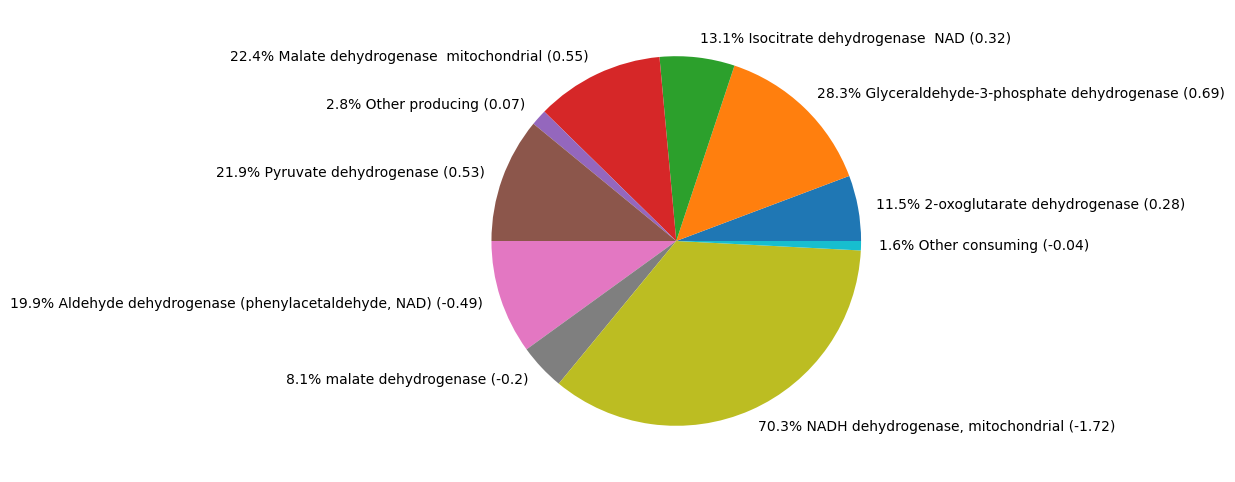

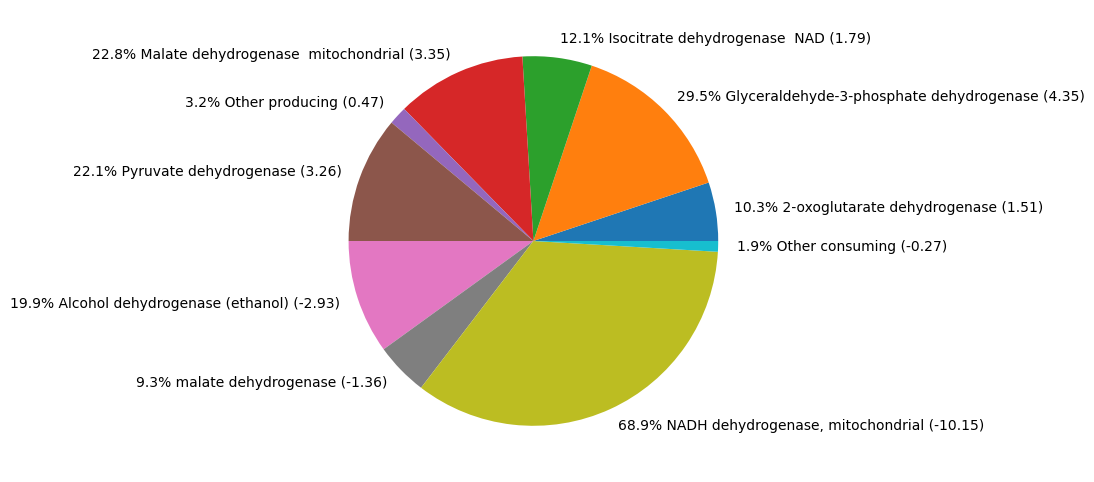

In [33]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 7.966086039658808, SUM consumed: -7.966086039658814
SUM produced: 47.18277816260432, SUM consumed: -47.18277816260432


([<matplotlib.patches.Wedge at 0x1d72ceb92b0>,
 [Text(0.3633953585062925, 1.0382407299928487, '78.6% ATP synthase  mitochondrial (37.07)'),
  Text(-0.8932756584891404, 0.6419179059278476, '3.2% Other producing (1.51)'),
  Text(-1.0006950589388328, 0.4567377792731909, '9.2% Phosphoglycerate kinase (4.35)'),
  Text(-1.0889662367296968, 0.1554108595393578, '9.0% Pyruvate kinase (4.26)'),
  Text(-0.5129020742186373, -0.9731040346551955, '69.1% Biomass (-32.61)'),
  Text(0.7118739857843843, -0.8385913357312097, '6.6% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.0207660996702173, -0.40992263875523205, '24.3% Other consuming (-11.47)')])

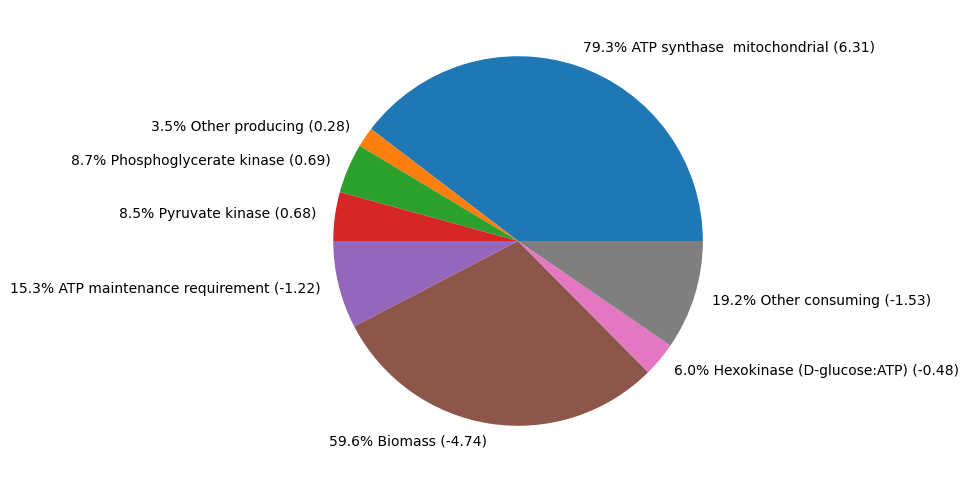

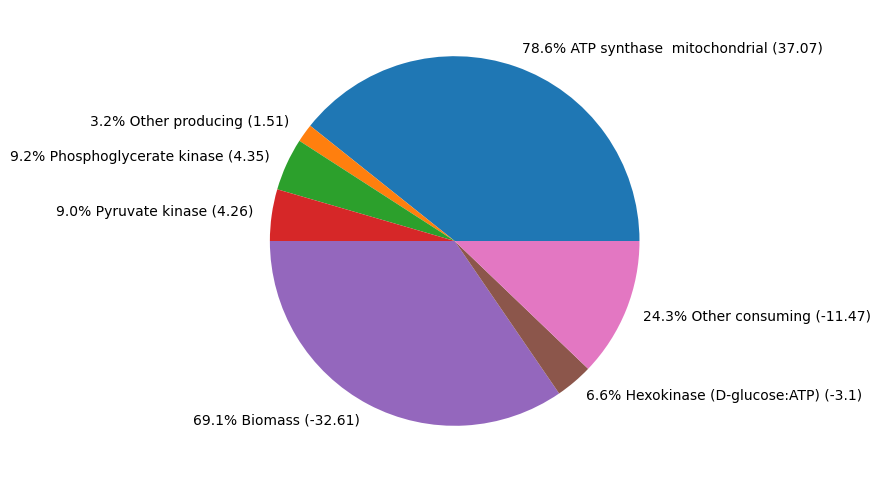

In [34]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

### NGAM minimisation

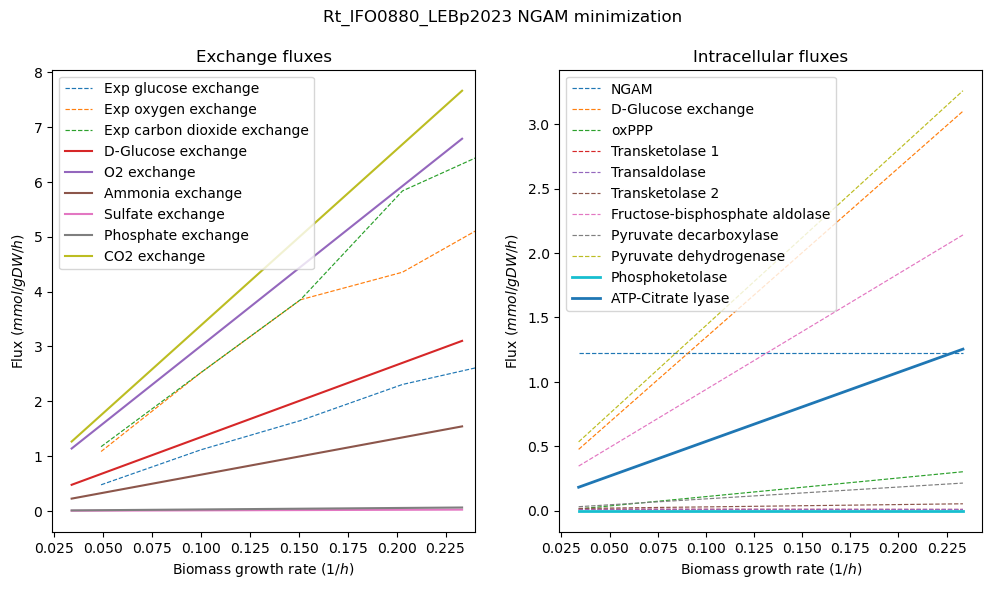

In [35]:
# growth_rates =  [0.03371, 0.08199, 0.12239, 0.17211, 0.23226] # nonrounded GR from biomass maz sim [0.033713, 0.081992, 0.122398, 0.172112, 0.232267] # rounded, gives different values for ATPM [0.03, 0.08, 0.12, 0.17, 0.23] #
NGAM_rxn_ID = "ATPM"

IFOjsb_all_fluxes_nm = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, intracellular_metabolites)

phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, ['XPK', 'ACITL'])

title = 'Rt_IFO0880_LEBp2023 NGAM minimization'
fig = f.plot_ex_intr_fluxes(IFOjsb_all_fluxes_nm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_NGAM_min.png")

Cofactor balances

SUM produced: 0.5721775402344639, SUM consumed: -0.572177540234478
SUM produced: 1.3894402980085439, SUM consumed: -1.3894402980085478
SUM produced: 2.0734815404087894, SUM consumed: -2.073481540408795
SUM produced: 2.9150828442608288, SUM consumed: -2.9150828442608003
SUM produced: 3.933458851205151, SUM consumed: -3.9334588512051507


([<matplotlib.patches.Wedge at 0x1fe71112cf0>,
 [Text(0.4272779670930327, 1.013623963231358, '74.6% Alcohol dehydrogenase (ethanol, NADP) (2.93)'),
  Text(-0.8326308041696586, 0.7188365210169749, '5.5% Aldehyde dehydrogenase  acetylaldehyde  NADP   mitochondrial (0.21)'),
  Text(-0.9622976757158537, 0.5329007255689054, '7.7% Glucose 6-phosphate dehydrogenase (0.3)'),
  Text(-1.0618269602375352, 0.28726904899887135, '7.7% Phosphogluconate dehydrogenase (0.3)'),
  Text(-1.0896070218270648, 0.15085270294282027, '0.4% Other producing (0.01)'),
  Text(-1.0976163421797653, 0.07237655269431228, '4.2% Pyridoxine:NADP+ 4-oxidoreductase (0.16)'),
  Text(-1.0990906184667524, -0.04471926205084358, '2.6% Aspartate-semialdehyde dehydrogenase (-0.1)'),
  Text(-1.0917855585455505, -0.13418008105296605, '2.6% C-4 sterol methyl oxidase (4,4-dimethylzymosterol) (-0.1)'),
  Text(-1.0771459830775776, -0.2230617204717991, '2.6% C 4 sterol methyl oxidase  4 methylzymosterol (-0.1)'),
  Text(-1.05546869329281

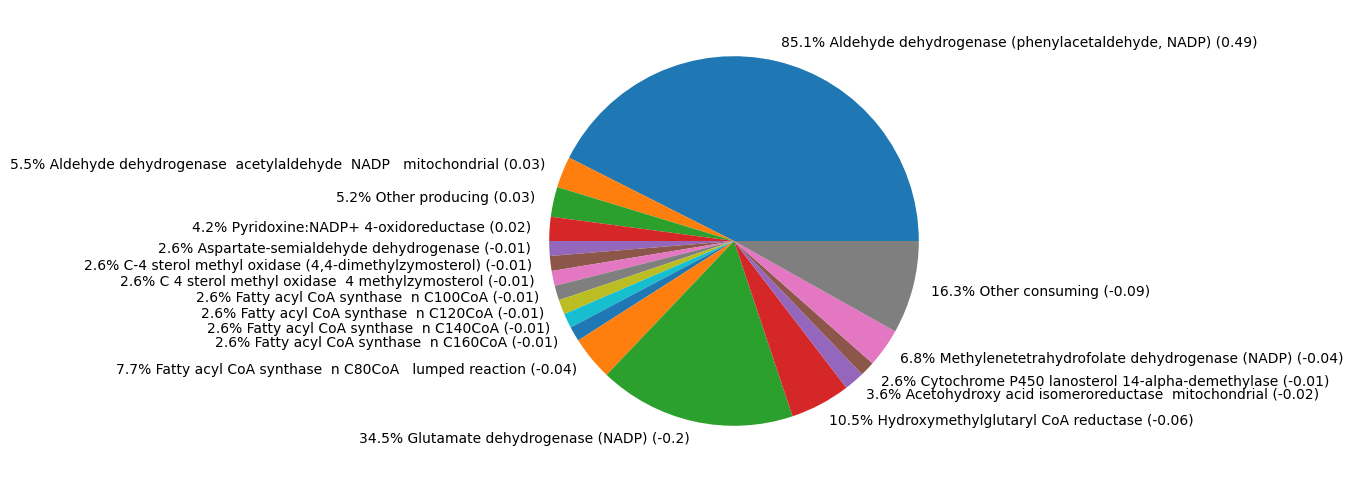

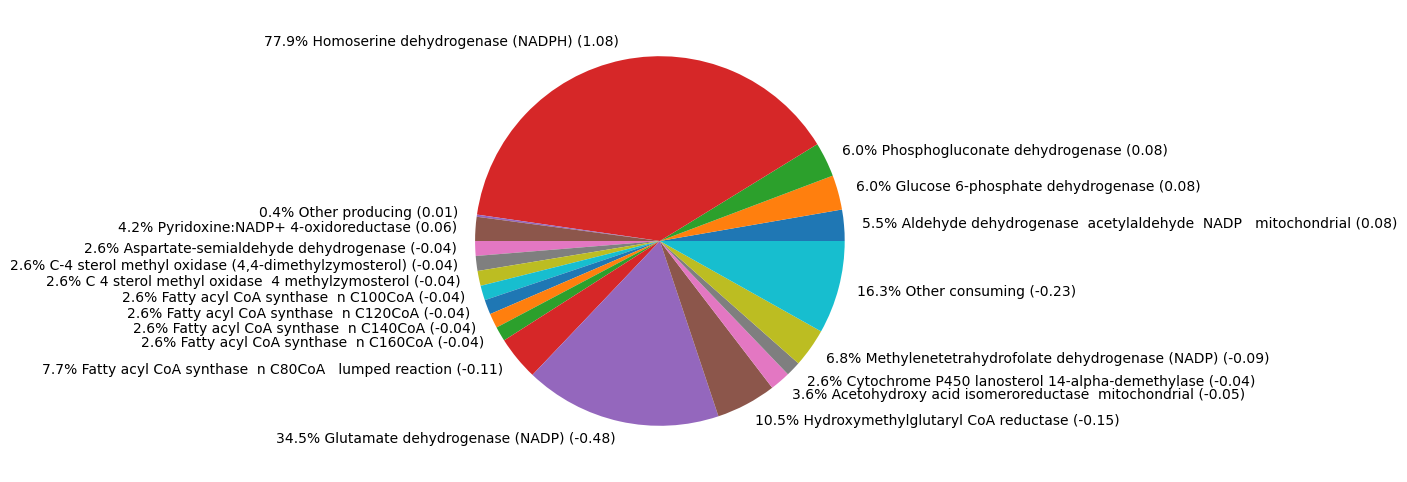

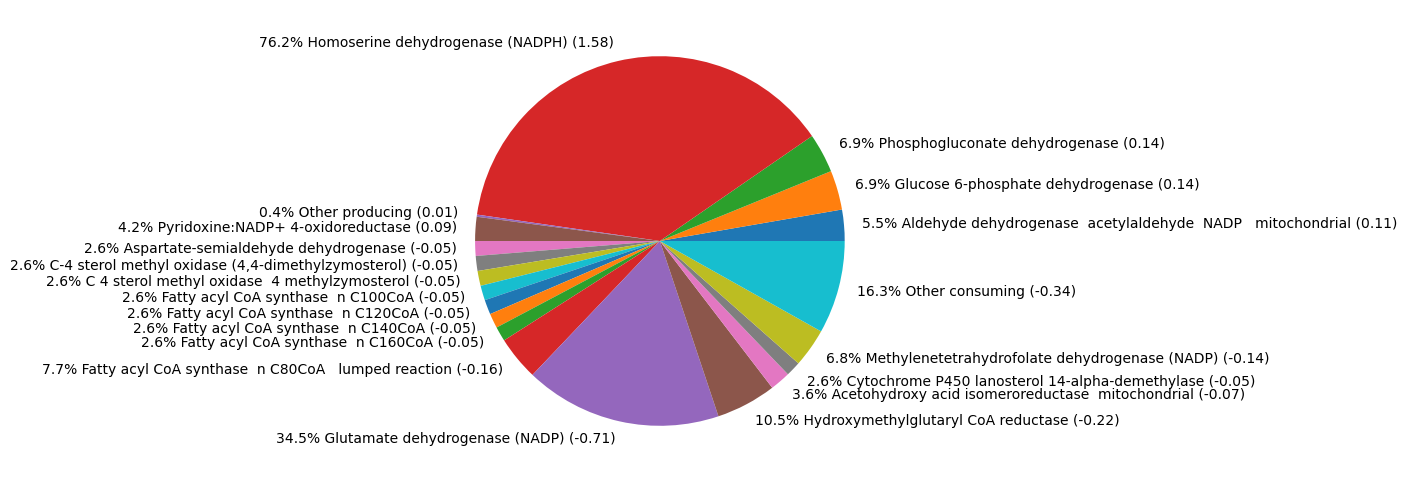

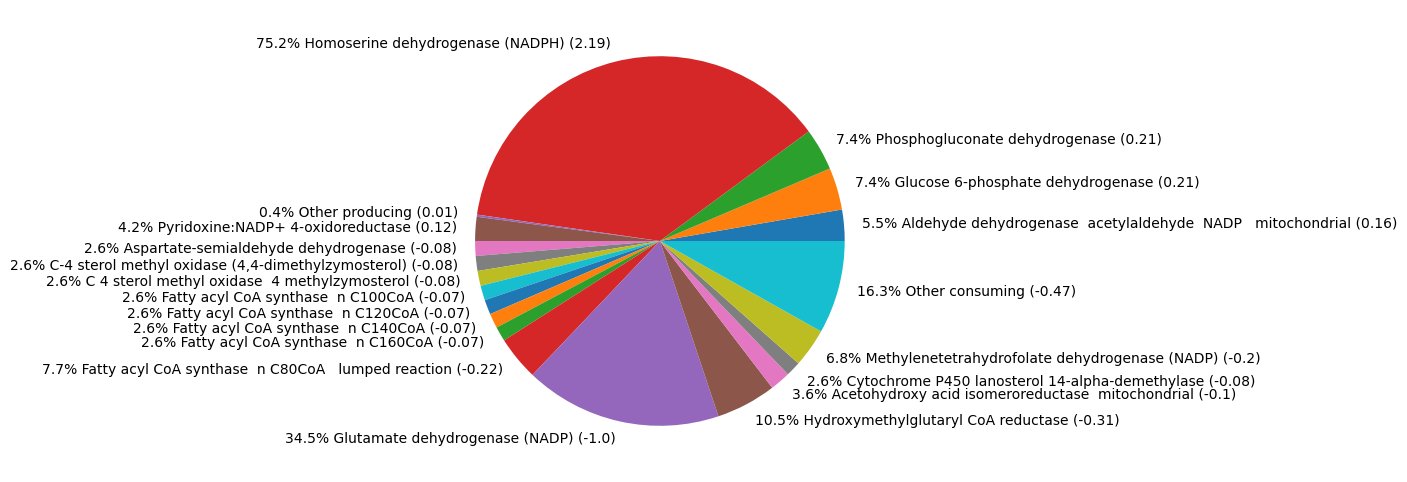

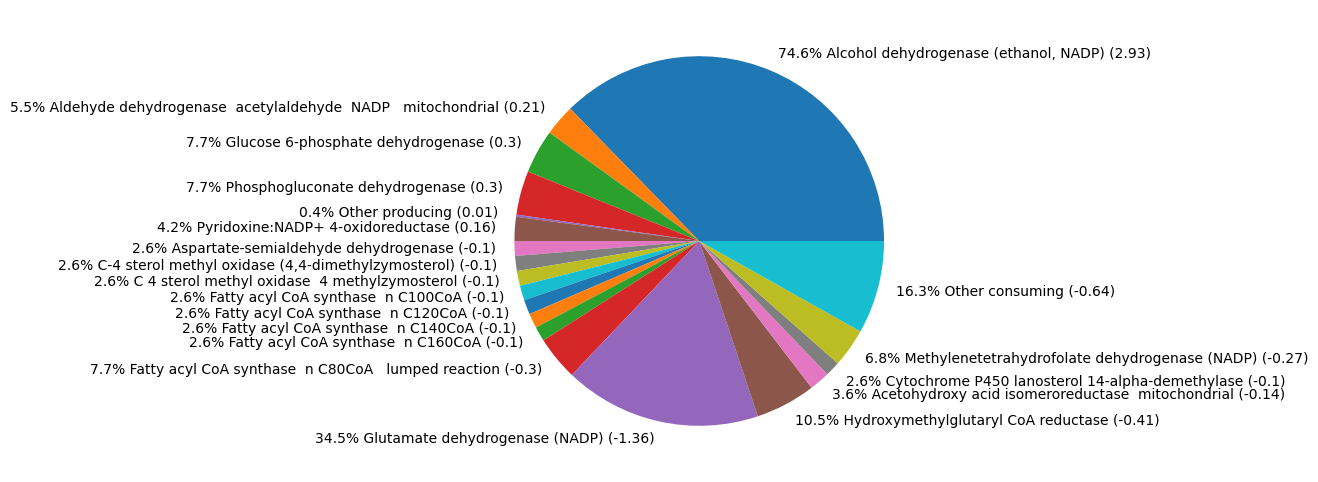

In [7]:

NGAM_rxn_ID = 'ATPM'
nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH.png")

nadph_fluxes_1 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 1)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH1.png")

 
nadph_fluxes_2 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 2)
pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)

nadph_fluxes_3 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 3)
pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3) 

nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH_max.png")
 
pie_nadph_fluxes_0
pie_nadph_fluxes_1
pie_nadph_fluxes_2
pie_nadph_fluxes_3
pie_nadph_fluxes_4

SUM produced: 2.442196319048117, SUM consumed: -2.4421963190488314
SUM produced: 14.721595438248107, SUM consumed: -14.721595438248107


([<matplotlib.patches.Wedge at 0x1d72c4430e0>,
 [Text(1.0857646129311325, 0.17639502630887444, '10.3% 2-oxoglutarate dehydrogenase (1.51)'),
  Text(0.7775314066101935, 0.7781034068392029, '29.5% Glyceraldehyde-3-phosphate dehydrogenase (4.35)'),
  Text(0.1435110154788385, 1.0905982708753177, '12.1% Isocitrate dehydrogenase  NAD (1.79)'),
  Text(-0.4457436722014168, 1.0056403823894484, '22.8% Malate dehydrogenase  mitochondrial (3.35)'),
  Text(-0.8080250143888804, 0.7463883547603417, '3.2% Other producing (0.47)'),
  Text(-1.0341598526109888, 0.374851169462786, '22.1% Pyruvate dehydrogenase (3.26)'),
  Text(-1.0465181435875273, -0.33882115509825494, '19.9% Alcohol dehydrogenase (ethanol) (-2.93)'),
  Text(-0.7882969428794054, -0.7671948447734666, '9.3% malate dehydrogenase (-1.36)'),
  Text(0.4580228774505614, -1.0001075160860997, '68.9% NADH dehydrogenase, mitochondrial (-10.15)'),
  Text(1.0995292375271901, -0.03217849938819531, '1.9% Other consuming (-0.27)')])

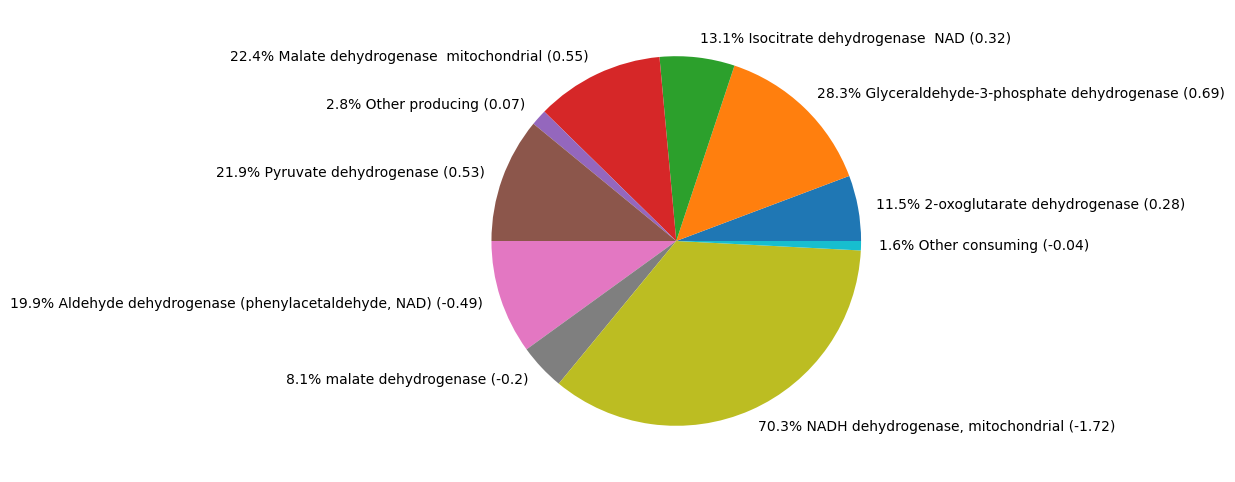

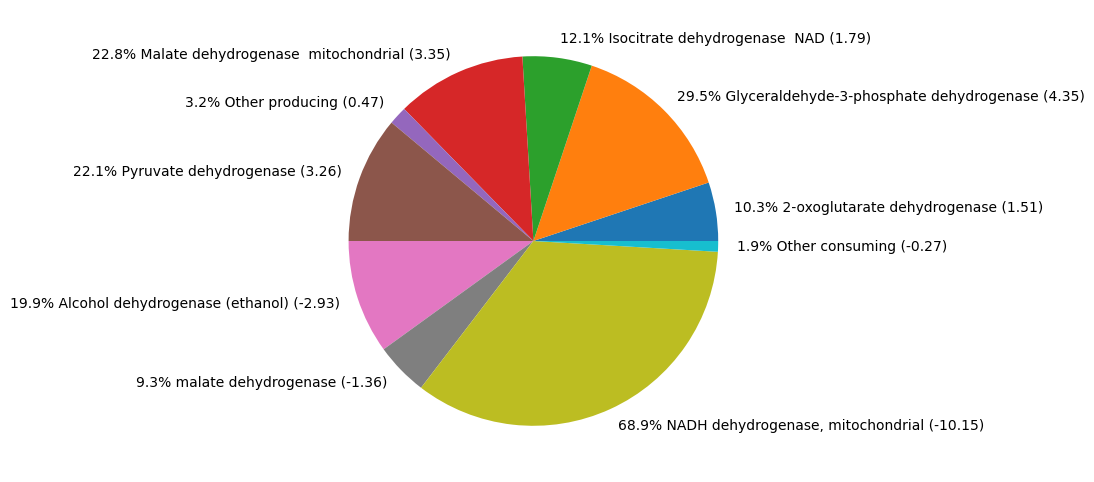

In [37]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 7.966086039659137, SUM consumed: -7.966086039660563
SUM produced: 47.182778162610795, SUM consumed: -47.182778162608095


([<matplotlib.patches.Wedge at 0x1d7309abc20>,
 [Text(0.3633953585062925, 1.0382407299928487, '78.6% ATP synthase  mitochondrial (37.07)'),
  Text(-0.8932756584891404, 0.6419179059278476, '3.2% Other producing (1.51)'),
  Text(-1.0006950589388328, 0.4567377792731909, '9.2% Phosphoglycerate kinase (4.35)'),
  Text(-1.0889662367296968, 0.1554108595393578, '9.0% Pyruvate kinase (4.26)'),
  Text(-0.5129020742186373, -0.9731040346551955, '69.1% Biomass (-32.61)'),
  Text(0.7118739857843843, -0.8385913357312097, '6.6% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.0207660996702173, -0.40992263875523205, '24.3% Other consuming (-11.47)')])

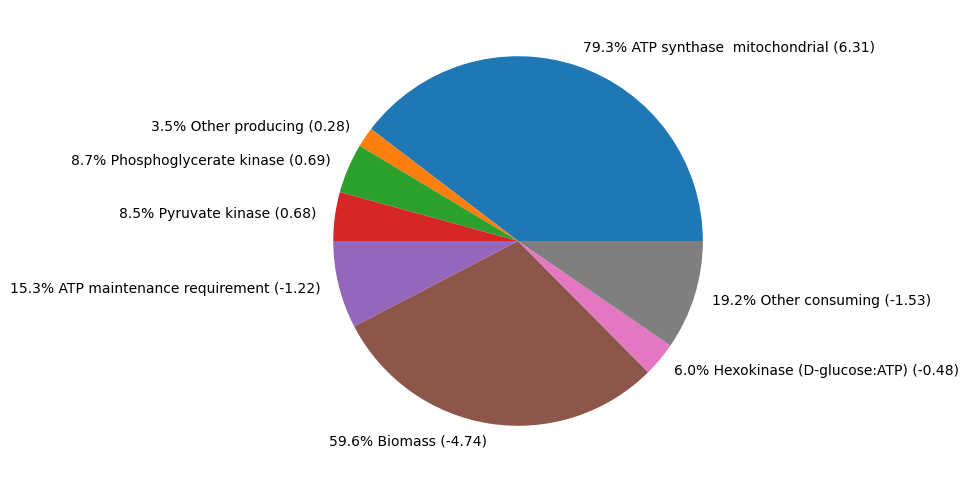

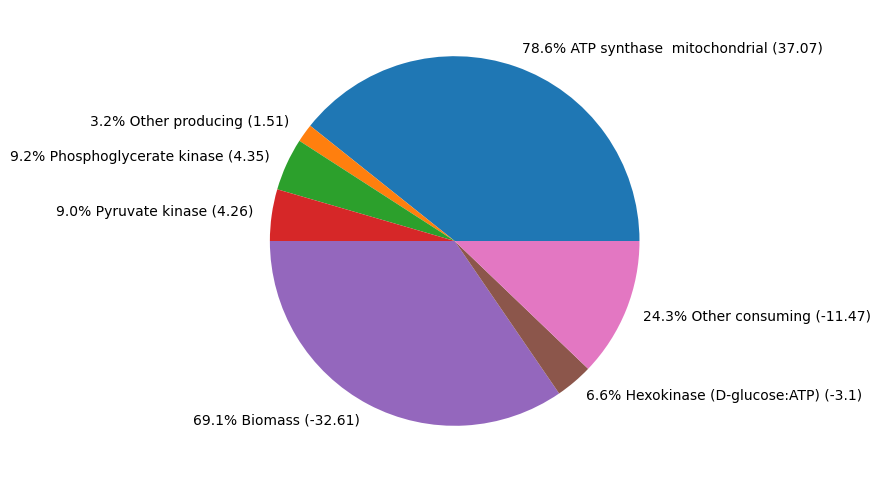

In [38]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [39]:
# import pickle

# with open("../cofactor_comparison/IFO0880_jsb_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)